Заведем системные функции и константы

In [413]:
import numpy as np
import matplotlib.pyplot as plt

In [414]:
N_GRAPH = 1000

In [415]:
def get_xs(x, gap, n):
    xl = x - gap
    xr = x + gap
    s = (xr - xl) / (n - 1)
    return np.arange(xl, xr + 10 ** -9, s)

In [416]:
def get_diff(xs, f1, f2):
    return list(map(lambda x: abs(f1(x) - f2(x)), xs))

In [417]:
def draw(xs, ys, names=None):
    if type(xs) is not list:
        xs = [xs]
        ys = [ys]
        if names is not None:
            names = [names]
            
    n = len(xs)
    for i in range(n):
        plt.plot(xs[i], ys[i])
        
    if names is not None:
        plt.legend(names)
    plt.show()

# Пункт A

In [418]:
def get_lagrange_by_points(xs, ys):
    def foo(x):
        y = 0
        
        n = len(xs)
        for i in range(n):
            p = ys[i]
            
            for j in range(n):
                if j != i:
                    p *= (x - xs[j]) / (xs[i] - xs[j])
                    
            y += p
        return y
    
    return foo

def get_lagrange_by_function(xs, f):
    ys = list(map(f, xs))
    return get_lagrange_by_points(xs, ys)

def get_lagrange_error(x0, gap, N, f):
    xs_lagrange = get_xs(x0, gap, N)
    f_lagrange = get_lagrange_by_function(xs_lagrange, f)
    
    xs_graph = get_xs(x0, gap, N_GRAPH)
    ys_diff = get_diff(xs_graph, f, f_lagrange)
    
    max_error = max(ys_diff)
    return xs_graph, ys_diff, max_error

In [419]:
x0 = np.longdouble(100)
gap = np.longdouble(5)

def fs(x):
    return x * np.longdouble(np.sin(2 * x))

In [420]:
N = 5
xs_5, ys_5, max_error = get_lagrange_error(x0, gap, N, fs)
print("for N =", N, "max(error) =", max_error)

for N = 5 max(error) = 199.70966085832984083


In [421]:
N = 10
xs_10, ys_10, max_error = get_lagrange_error(x0, gap, N, fs)
print("for N =", N, "max(error) =", max_error)

for N = 10 max(error) = 442.6413800667665765


In [422]:
N = 15
xs_15, ys_15, max_error = get_lagrange_error(x0, gap, N, fs)
print("for N =", N, "max(error) =", max_error)

for N = 15 max(error) = 37.7841456446630933


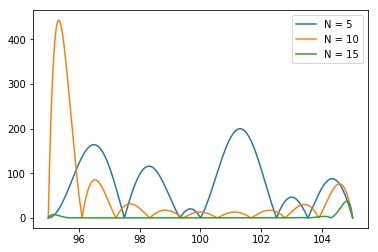

In [423]:
xs = [xs_5, xs_10, xs_15]
ys = [ys_5, ys_10, ys_15]
names = ["N = 5", "N = 10", "N = 15"]
draw(xs, ys, names)

Погрешности растут на концах интервалов. Также можно заметить, что ошибки убывают с ростом $N$. 

# Пункт B

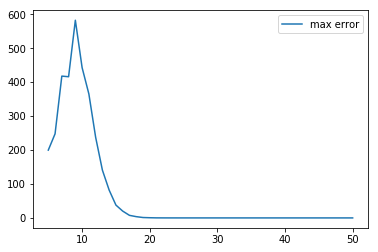

In [424]:
N_from = 5
N_to = 50
Ns = range(N_from, N_to + 1)
max_errors = list(map(lambda N: get_lagrange_error(x0, gap, N, fs)[2], Ns))
draw(Ns, max_errors, "max error")

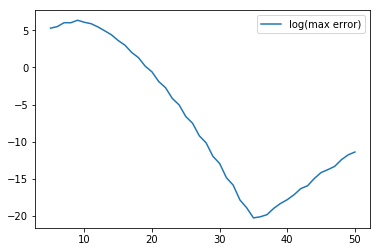

In [425]:
max_errors_log = list(map(lambda x: np.log(x), max_errors))
draw(Ns, max_errors_log, "log(max error)")

Погрешности возрастают до 10 и убывают после. Этот результат согласуетя с теорией.

Возрастание в конце, которое хорошо видно на графике логарифма, связано с потерей точности во $float128$ при интерполяции высокими степенями.

# Пункт C

In [426]:
def get_chebyshev_by_function(x_from, x_to, N, f):
    convert = lambda x: (x_from + x_to) / np.longdouble(2) + (x_to - x_from) * x / np.longdouble(2)
    point = lambda k: np.longdouble(np.cos(np.longdouble(np.pi) / 2 * (2 * k - 1) / N))
    xs = list(map(lambda k: convert(point(k)), range(1, N + 1)))
    ys = list(map(f, xs))
    return get_lagrange_by_points(xs, ys)

def get_chebyshev_error(x0, gap, N, f):
    x_from = x0 - gap
    x_to = x0 + gap
    f_lagrange = get_chebyshev_by_function(x_from, x_to, N, f)
    
    xs_graph = get_xs(x0, gap, N_GRAPH)
    ys_diff = get_diff(xs_graph, f, f_lagrange)
    
    max_error = max(ys_diff)
    return xs_graph, ys_diff, max_error

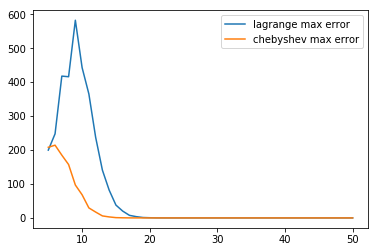

In [427]:
N_from = 5
N_to = 50
Ns = range(N_from, N_to + 1)
max_errors_lagrange = list(map(lambda N: get_lagrange_error(x0, gap, N, fs)[2], Ns))
max_errors_chebyshev = list(map(lambda N: get_chebyshev_error(x0, gap, N, fs)[2], Ns))

xs = [Ns] * 2
ys = [max_errors_lagrange, max_errors_chebyshev]
names = ["lagrange max error", "chebyshev max error"]
draw(xs, ys, names)

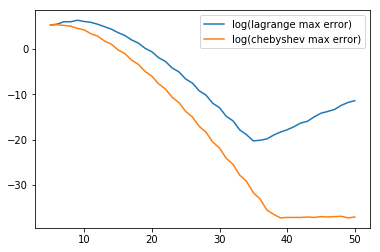

In [428]:
max_errors_lagrange_log = list(map(lambda x: np.log(x), max_errors_lagrange))
max_errors_chebyshev_log = list(map(lambda x: np.log(x), max_errors_chebyshev))

xs = [Ns] * 2
ys = [max_errors_lagrange_log, max_errors_chebyshev_log]
names = ["log(lagrange max error)", "log(chebyshev max error)"]
draw(xs, ys, names)

Погрешность Чебышевских узлов меньше чем у равномерных. 

# Пункт D

In [429]:
def fm(x):
    return abs(x - 1)

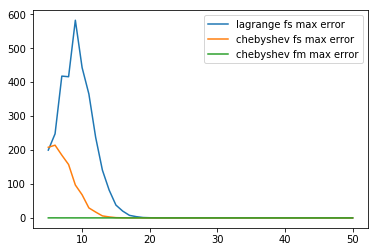

In [430]:
x0_s = np.longdouble(100)
gap_s = np.longdouble(5)

x0_m = np.longdouble(1)
gap_m = np.longdouble(1)

N_from = 5
N_to = 50
Ns = range(N_from, N_to + 1)
max_errors_lagrange_s = list(map(lambda N: get_lagrange_error(x0_s, gap_s, N, fs)[2], Ns))
max_errors_chebyshev_s = list(map(lambda N: get_chebyshev_error(x0_s, gap_s, N, fs)[2], Ns))
max_errors_lagrange_m = list(map(lambda N: get_lagrange_error(x0_m, gap_m, N, fm)[2], Ns))
max_errors_chebyshev_m = list(map(lambda N: get_chebyshev_error(x0_m, gap_m, N, fm)[2], Ns))

xs = [Ns] * 3
ys = [max_errors_lagrange_s, 
      max_errors_chebyshev_s, 
      #max_errors_lagrange_m, 
      max_errors_chebyshev_m]
names = ["lagrange fs max error", 
         "chebyshev fs max error", 
         #"lagrange fm max error", 
         "chebyshev fm max error"]
draw(xs, ys, names)

Пришлось убрать график для равномерных узлов, так как он взрывается ближе к 50.

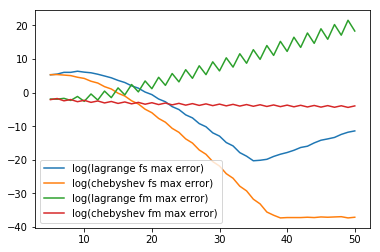

In [431]:
max_errors_lagrange_s_log = list(map(lambda x: np.log(x), max_errors_lagrange_s))
max_errors_chebyshev_s_log = list(map(lambda x: np.log(x), max_errors_chebyshev_s))
max_errors_lagrange_m_log = list(map(lambda x: np.log(x), max_errors_lagrange_m))
max_errors_chebyshev_m_log = list(map(lambda x: np.log(x), max_errors_chebyshev_m))

xs = [Ns] * 4
ys = [max_errors_lagrange_s_log, 
      max_errors_chebyshev_s_log, 
      max_errors_lagrange_m_log, 
      max_errors_chebyshev_m_log]
names = ["log(lagrange fs max error)", 
         "log(chebyshev fs max error)", 
         "log(lagrange fm max error)", 
         "log(chebyshev fm max error)"]
draw(xs, ys, names)

Судя по графику логарифмов для функции $f_M$ можно сказать, что, в случае равномерных узлов, погрешности на концах интерполируемого отрезка растут экспоненциально, а для Чебышевских узлов они экспоненциально убывают.